In [8]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import os
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

In [9]:
my_df = pd.read_csv('FinalData.csv', index_col='video_id')

In [19]:
my_df.head()

,Unnamed: 0,trending_date,title,channel_title,category_id,category,publish_time,tags,views,likes,dislikes,comment_count,description,region
video_id,,,,,,,,,,,,,,
n1WpP7iowLc,0,2017-11-14 00:00:00,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,Music,2017-11-10 17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,Eminem's new track Walk on Water ft. Beyoncé i...,CA
0dBIkQ4Mz1M,1,2017-11-14 00:00:00,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,Comedy,2017-11-13 17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,STill got a lot of packages. Probably will las...,CA
5qpjK5DgCt4,2,2017-11-14 00:00:00,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA
d380meD0W0M,3,2017-11-14 00:00:00,I Dare You: GOING BALD!?,nigahiga,24,Entertainment,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,I know it's been a while since we did this sho...,CA
2Vv-BfVoq4g,4,2017-11-14 00:00:00,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,Music,2017-11-09 11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA


In [10]:
my_df.describe()

,Unnamed: 0,category_id,views,likes,dislikes,comment_count
count,158098.000000,158098.000000,1.580980e+05,1.580980e+05,1.580980e+05,1.580980e+05
mean,79048.500000,19.790250,2.613847e+06,6.898179e+04,3.748059e+03,7.345998e+03
std,45639.105767,7.405367,1.059344e+07,2.284840e+05,3.189644e+04,3.438558e+04
min,0.000000,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,39524.250000,17.000000,1.690242e+05,2.440000e+03,1.390000e+02,3.260000e+02
50%,79048.500000,24.000000,4.956635e+05,1.116200e+04,4.630000e+02,1.270000e+03
75%,118572.750000,24.000000,1.530977e+06,4.407775e+04,1.617000e+03,4.419000e+03
max,158097.000000,43.000000,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06


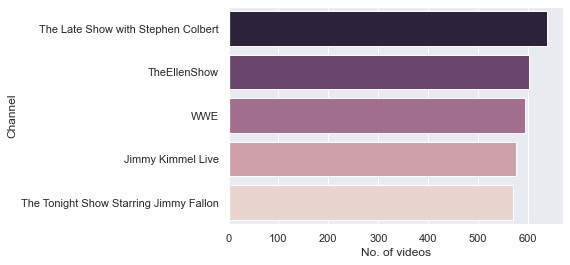

In [91]:
#Which channel posted the most number of videos? List the top 5 channels with the most videos.

vcount = my_df.groupby("channel_title").size().reset_index(name="video_count") 
cdf = vcount.sort_values("video_count", ascending=False).head(5)
fig, ax = plt.subplots()
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=5, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

In [12]:
#How many videos did The top 5 channel posted?
cdf = my_df.groupby("channel_title","category").size().reset_index(name="video_count").sort_values("video_count", ascending=False).head(5)
cdf

,channel_title,video_count
6198,The Late Show with Stephen Colbert,639
6331,TheEllenShow,603
6912,WWE,594
2996,Jimmy Kimmel Live,576
6277,The Tonight Show Starring Jimmy Fallon,570


In [92]:
#which channel wins the most number of views?
#categorize = my_df.groupby("category").size().reset_index(name="categorized")
most_views = pd.pivot_table(data = my_df,index =['channel_title','category'] ,values='views',aggfunc=np.sum).sort_values('views',ascending=False).head(5)
most_views


,,views
channel_title,category,
ChildishGambinoVEVO,Music,10271573447
NickyJamTV,Music,9002554388
Ozuna,Music,8448627293
Marvel Entertainment,Entertainment,8073441375
DrakeVEVO,Music,7355539765


Text(0, 0.5, 'views')

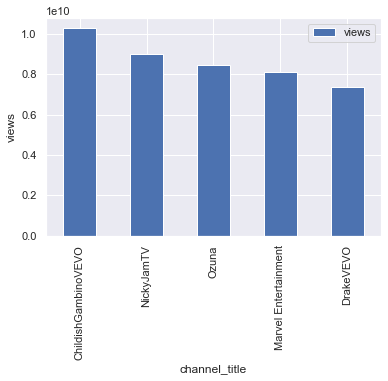

In [45]:
ax = most_likes.plot(kind="bar")
ax.set_xlabel("channel_title")
ax.set_ylabel("views")

In [81]:
#which channel wins the most likes? 

most_likes = pd.pivot_table(data = my_df,index =[ 'channel_title','category'],values='likes',aggfunc=np.sum).sort_values('likes',ascending=False).head(5)
most_likes


,,likes
channel_title,category,
ibighit,Music,532677963
ChildishGambinoVEVO,Music,259702791
Marvel Entertainment,Entertainment,230233691
DrakeVEVO,Music,171892684
TaylorSwiftVEVO,Music,163724748


Text(0, 0.5, 'likes')

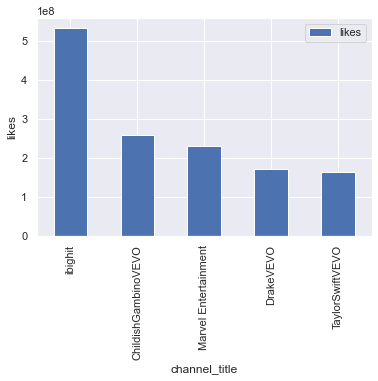

In [50]:
ax = most_likes.plot(kind="bar")
ax.set_xlabel("channel_title")
ax.set_ylabel("likes")

In [100]:
#which channel got the most dislikes? 

most_dislikes = pd.pivot_table(data = my_df,index =[ 'channel_title','category'],values='dislikes',aggfunc=np.sum).sort_values('dislikes',ascending=False).head(5)
most_dislikes



,,dislikes
channel_title,category,
YouTube Spotlight,Entertainment,53957987
Logan Paul Vlogs,Entertainment,38757872
ChildishGambinoVEVO,Music,16302722
Lucas Lucco,Music,10006058
TaylorSwiftVEVO,Music,8968290


Text(0, 0.5, 'dislikes')

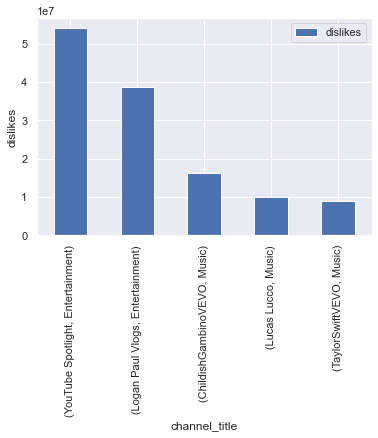

In [104]:
ax = most_dislikes.plot(kind="bar")
ax.set_xlabel("channel_title")
ax.set_ylabel("dislikes")

In [102]:
#which channel got the most commentss? 

most_comments = pd.pivot_table(data = my_df,index =[ 'channel_title','category'],values='comment_count',aggfunc=np.sum).sort_values('comment_count',ascending=False).head(5)
most_comments

,,comment_count
channel_title,category,
ibighit,Music,83001168
Logan Paul Vlogs,Entertainment,38080258
YouTube Spotlight,Entertainment,30433734
ChildishGambinoVEVO,Music,27138372
Marvel Entertainment,Entertainment,27123009


Text(0, 0.5, 'comments count')

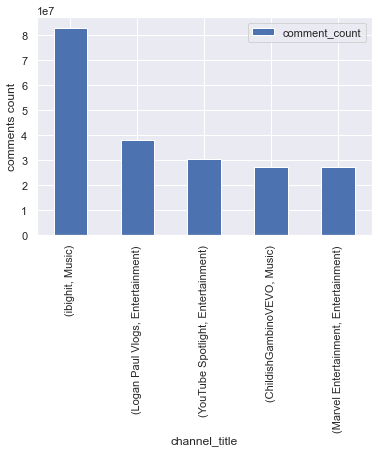

In [105]:
ax = most_comments.plot(kind="bar")
ax.set_xlabel("channel_title")
ax.set_ylabel("comments count")

In [93]:
my_df.describe()

,Unnamed: 0,category_id,views,likes,dislikes,comment_count
count,158098.000000,158098.000000,1.580980e+05,1.580980e+05,1.580980e+05,1.580980e+05
mean,79048.500000,19.790250,2.613847e+06,6.898179e+04,3.748059e+03,7.345998e+03
std,45639.105767,7.405367,1.059344e+07,2.284840e+05,3.189644e+04,3.438558e+04
min,0.000000,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,39524.250000,17.000000,1.690242e+05,2.440000e+03,1.390000e+02,3.260000e+02
50%,79048.500000,24.000000,4.956635e+05,1.116200e+04,4.630000e+02,1.270000e+03
75%,118572.750000,24.000000,1.530977e+06,4.407775e+04,1.617000e+03,4.419000e+03
max,158097.000000,43.000000,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06


E:\NTU\k6312\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\NTU\k6312\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\NTU\k6312\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

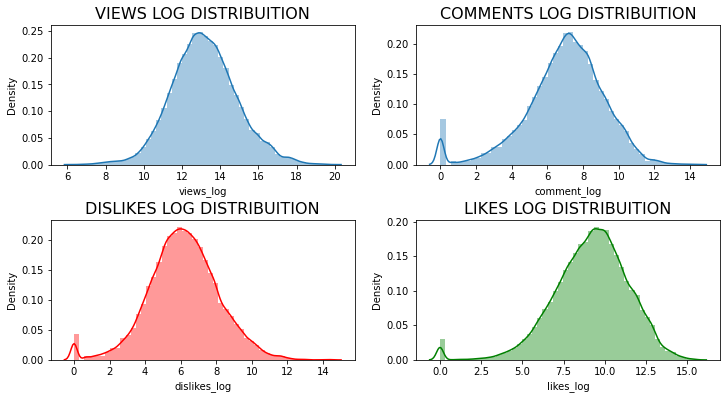

In [5]:
my_df['likes_log'] = np.log(my_df['likes'] + 1)
my_df['views_log'] = np.log(my_df['views'] + 1)
my_df['dislikes_log'] = np.log(my_df['dislikes'] + 1)
my_df['comment_log'] = np.log(my_df['comment_count'] + 1)



plt.figure(figsize = (12,6))

plt.subplot(221)
g1 = sns.distplot(my_df['views_log'])
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(my_df['likes_log'],color='green')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(my_df['dislikes_log'], color='r')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(my_df['comment_log'])
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

video_id
n1WpP7iowLc     4.589104
0dBIkQ4Mz1M    12.594873
5qpjK5DgCt4     4.575843
d380meD0W0M     6.309630
2Vv-BfVoq4g     4.874563
                 ...    
BZt0qjTWNhw     2.263870
1h7KV2sjUWY     5.635623
D6Oy4LfoqsU     4.507286
oV0zkMe1K8s     3.408645
ooyjaVdt-jA     3.464728
Name: like_rate, Length: 158098, dtype: float64


E:\NTU\k6312\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\NTU\k6312\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\NTU\k6312\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for ker

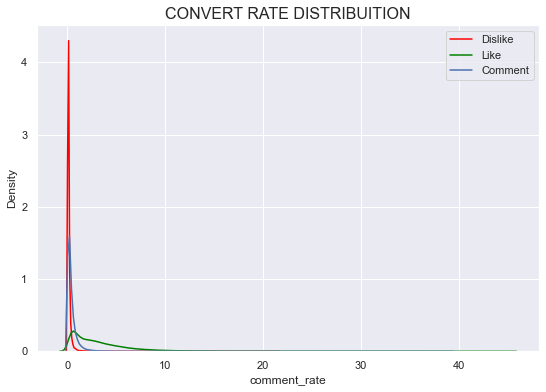

In [106]:
my_df['like_rate'] =  my_df ['likes'] / my_df['views'] * 100
my_df['dislike_rate'] =  my_df ['dislikes'] / my_df['views'] * 100
my_df['comment_rate'] =  my_df ['comment_count'] / my_df['views'] * 100

print(my_df['like_rate'])

plt.figure(figsize = (9,6))

g1 = sns.distplot(my_df['dislike_rate'], color='red',hist=False, label="Dislike")
g1 = sns.distplot(my_df['like_rate'], color='green',hist=False, label="Like")
g1 = sns.distplot(my_df['comment_rate'],hist=False,label="Comment")
g1.set_title('CONVERT RATE DISTRIBUITION', fontsize=16)
plt.legend()
plt.show()

,views,likes,dislikes,comment_count
views,1.000000,0.790342,0.414937,0.501701
likes,0.790342,1.000000,0.454131,0.773195
dislikes,0.414937,0.454131,1.000000,0.733559
comment_count,0.501701,0.773195,0.733559,1.000000


<AxesSubplot:>

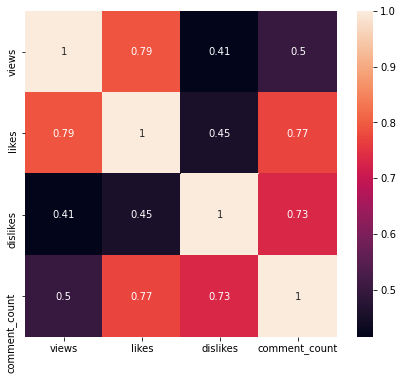

In [13]:
#Is there any correlation between the number of views, likes, dislikes, and comments? What is their correlation?

corr_ft = my_df[['views', 'likes', 'dislikes', 'comment_count']]
corr = corr_ft.corr()
display(corr)
plt.figure(figsize = (7,6))
sns.heatmap(corr, annot = True)

